## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 2.8~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-10}~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 1500 шагов: 500 на уравновешивание системы при фиксированной температуре и 1000 на усреднение по времени;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

#### Путь к файлам с данными

In [2]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, '2020-12-18')

In [3]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_file_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

#### Температуры, для которых была подчитана функция радиального распределения

In [4]:
temperatures = (
    2.79885,
    2.69928,
    2.29258,
    1.80129,
    1.29886,
    0.80177,
    0.29926,
    0.00000,
)

#### Извлечение значений функции радиального распределения из файлов

In [5]:
rdf_data = pd.DataFrame(columns=['radius'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    
rdf_data

,radius,2.79885,2.69928,2.29258,1.80129,1.29886,0.80177,0.29926,0.00000
0,0.005,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08
1,0.015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.035,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.045,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
608,6.085,1.000924e+00,9.986728e-01,9.998267e-01,1.000414e+00,1.000232e+00,9.991735e-01,9.647026e-01,9.908854e-01
609,6.095,1.000053e+00,9.977736e-01,1.000215e+00,1.000953e+00,1.000862e+00,9.980694e-01,9.639683e-01,9.617342e-01
610,6.105,1.000741e+00,9.983783e-01,9.997144e-01,1.001033e+00,1.000845e+00,9.997890e-01,9.625615e-01,9.526654e-01
611,6.115,1.000022e+00,9.989275e-01,1.001685e+00,9.998270e-01,1.001739e+00,9.995718e-01,9.602763e-01,9.422840e-01


#### Графики функций радиального распределения при различных температурах

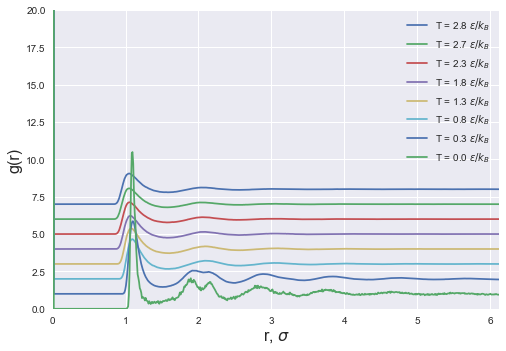

In [6]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$', fontsize=16);
plt.ylabel('g(r)', fontsize=16);
plt.xlim(left=0, right=6.125);
plt.ylim(
    bottom=0, 
    top=20,
);
plt.legend();

#### Извлечение параметров системы из файла

In [7]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial
0,2.79885,-0.83876,5760.02448,-7980.77998,-2218.37998,-16150.40094
1,2.79649,-0.80090,5755.16981,-7956.24291,-2196.21843,-15936.83755
2,2.79326,-0.74442,5748.53761,-7929.59139,-2174.42158,-15615.64010
3,2.78825,-0.66565,5738.22488,-7898.75750,-2150.21989,-15168.00531
4,2.78057,-0.55746,5722.41105,-7855.83068,-2117.60580,-14550.74504
...,...,...,...,...,...,...
39995,0.00000,-0.52198,0.00005,-9360.84135,-9360.63575,-2879.05101
39996,0.00011,-0.52204,0.21794,-9360.83623,-9360.83618,-2878.96771
39997,0.00000,-0.52200,0.00004,-9360.86179,-9360.64385,-2879.17720
39998,0.00010,-0.52208,0.20571,-9360.86160,-9360.86156,-2879.17409


In [8]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

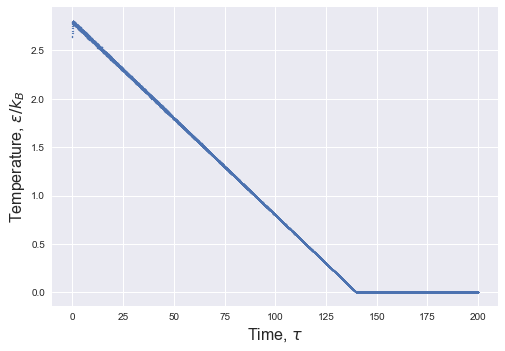

In [9]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Temperature, $\epsilon / k_B$', fontsize=16);

plt.ylim(
#     bottom=2.75,
#     top=2.85,
);

#### Зависимость давления системы от времени

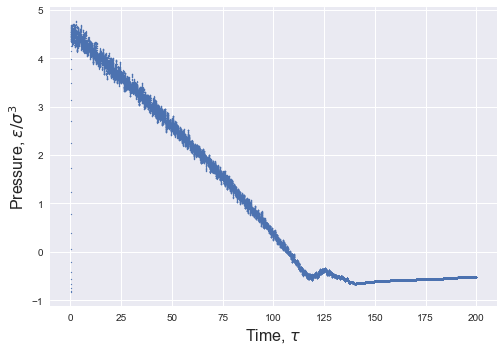

In [10]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $', fontsize=16);

plt.ylim(
#     bottom=3.5,
#     top=5.5,
);

#### Зависимость кинетической энергии системы от времени

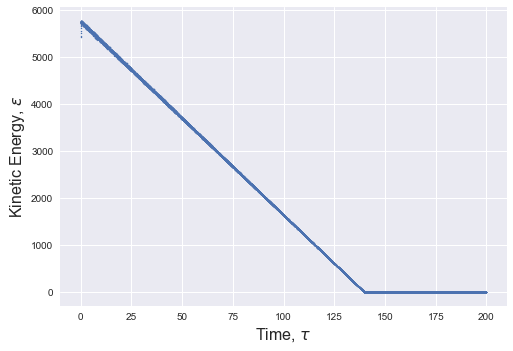

In [11]:
plt.scatter(
    times,
    system_parameters['kinetic_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Kinetic Energy, $\epsilon$', fontsize=16);

# plt.ylim(
#     bottom=-6000,
#     top=4000,
# );

#### Зависимость потенциальной энергии системы от времени

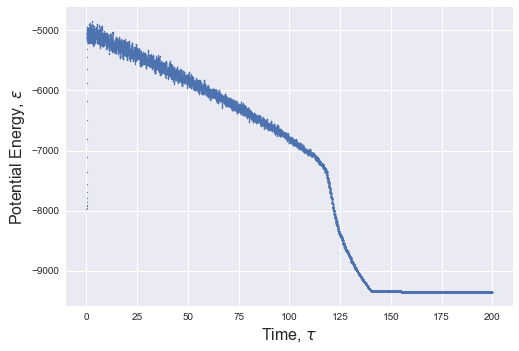

In [12]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Potential Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
#     top=4000,
);

#### Зависимость полной энергии системы от времени

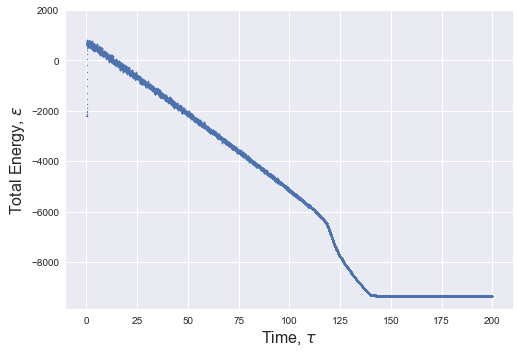

In [13]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Total Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
    top=2000,
);

#### Энергии на одном графике

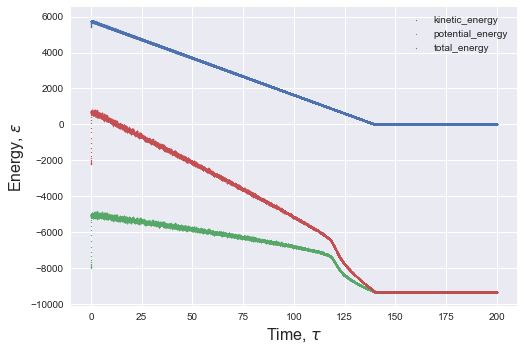

In [14]:
plt.scatter(
    times,
    system_parameters['kinetic_energy'],
    s=1,
    label='kinetic_energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='potential_energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='total_energy',
);

plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Energy, $\epsilon$', fontsize=16);
plt.legend();

plt.ylim(
#     bottom=-6000,
#     top=2000,
);